### Hackathon on IPL Data Analysis Hackathon

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
deliveries_df = pd.read_csv('deliveries.csv') 
matches_df = pd.read_csv('matches.csv')  
df = pd.concat([deliveries_df, matches_df], ignore_index=True) ## Concatenate both DataFrames
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1.0,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,1.0,DA Warner,S Dhawan,TS Mills,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,2.0,DA Warner,S Dhawan,TS Mills,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,3.0,DA Warner,S Dhawan,TS Mills,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,4.0,DA Warner,S Dhawan,TS Mills,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,5.0,DA Warner,S Dhawan,TS Mills,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
match_col = matches_df.columns.tolist()
match_col

['id',
 'season',
 'city',
 'date',
 'team1',
 'team2',
 'toss_winner',
 'toss_decision',
 'result',
 'dl_applied',
 'winner',
 'win_by_runs',
 'win_by_wickets',
 'player_of_match',
 'venue',
 'umpire1',
 'umpire2',
 'umpire3']

In [6]:
deliver_col = deliveries_df.columns.tolist()
deliver_col

['match_id',
 'inning',
 'batting_team',
 'bowling_team',
 'over',
 'ball',
 'batsman',
 'non_striker',
 'bowler',
 'is_super_over',
 'wide_runs',
 'bye_runs',
 'legbye_runs',
 'noball_runs',
 'penalty_runs',
 'batsman_runs',
 'extra_runs',
 'total_runs',
 'player_dismissed',
 'dismissal_kind',
 'fielder']

In [7]:
df_col = df.columns.tolist()
df_col

['match_id',
 'inning',
 'batting_team',
 'bowling_team',
 'over',
 'ball',
 'batsman',
 'non_striker',
 'bowler',
 'is_super_over',
 'wide_runs',
 'bye_runs',
 'legbye_runs',
 'noball_runs',
 'penalty_runs',
 'batsman_runs',
 'extra_runs',
 'total_runs',
 'player_dismissed',
 'dismissal_kind',
 'fielder',
 'id',
 'season',
 'city',
 'date',
 'team1',
 'team2',
 'toss_winner',
 'toss_decision',
 'result',
 'dl_applied',
 'winner',
 'win_by_runs',
 'win_by_wickets',
 'player_of_match',
 'venue',
 'umpire1',
 'umpire2',
 'umpire3']

#### 1. Which of the following is the right way to merge 2 datasets for getting better insights from the data
*
1 point
left=match_id, right=id
left=match_id, right=dl_applied
Both A and B
None of the above/

In [8]:
# Merge datasets using 'match_id' from deliveries and 'id' from matches
merged_data = pd.merge(deliveries_df, matches_df, left_on='match_id', right_on='dl_applied')
merged_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,1,Kolkata Knight Riders,0,7,NM Coulter-Nile,M Chinnaswamy Stadium,AK Chaudhary,Nitin Menon,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,1,Kings XI Punjab,6,0,DPMD Jayawardene,Feroz Shah Kotla,AV Jayaprakash,RE Koertzen,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,1,Chennai Super Kings,3,0,M Ntini,Eden Gardens,Asad Rauf,K Hariharan,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands,MR Benson,SD Ranade,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,1,Kolkata Knight Riders,11,0,CH Gayle,Kingsmead,DJ Harper,SD Ranade,NaN


In [9]:
merge_data = pd.merge(deliveries_df, matches_df, left_on='match_id', right_on='id')
merge_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


2. The column which has the most missing values according to the data is:
*
1 point
city
venue
umpire3
None of the above

In [10]:
df.isnull().sum().max()


179715

In [11]:
df.isnull().sum() #umpire3 

match_id               756
inning                 756
batting_team           756
bowling_team           756
over                   756
ball                   756
batsman                756
non_striker            756
bowler                 756
is_super_over          756
wide_runs              756
bye_runs               756
legbye_runs            756
noball_runs            756
penalty_runs           756
batsman_runs           756
extra_runs             756
total_runs             756
player_dismissed    171000
dismissal_kind      171000
fielder             173386
id                  179078
season              179078
city                179085
date                179078
team1               179078
team2               179078
toss_winner         179078
toss_decision       179078
result              179078
dl_applied          179078
winner              179082
win_by_runs         179078
win_by_wickets      179078
player_of_match     179082
venue               179078
umpire1             179080
u

3. City which hosted most number of seasons according to the data is:
*
1 point
Abu Dhabi
Delhi
Bengaluru
Mumbai

In [12]:
# Grouping data by 'city' and counting unique seasons
city_season_count = df.groupby('city')['season'].nunique()
# city with the maximum number of seasons
city_with_most_seasons = city_season_count.idxmax()
# Displaying the city which hosted the most number of seasons
print("City which hosted most number of seasons:", city_with_most_seasons)

City which hosted most number of seasons: Delhi


4. Which year has the most number of matches played?
*
1 point
2011
2013
2019
2014

In [13]:
# Extracting year from  date col and creating a new column 'year'
df['year'] = pd.to_datetime(df['date']).dt.year

# Count no of matches played in each year
matches_per_year = df['year'].value_counts()

# Finding the year with the maximum number of matches
year_with_most_matches = matches_per_year.idxmax()

# Displaying the year with the most number of matches played
print("most number of matches played:", year_with_most_matches,"Year")

most number of matches played: 2013.0 Year


5. Maximum wins by Mumbai Indians in 2011 are
*
1 point
10
11
8
15

In [14]:
import pandas as pd

# Assuming 'deliveries' and 'matches' are your DataFrames with the mentioned columns
# Replace 'deliveries' and 'matches' with the names of your actual DataFrames

# Filter matches for Mumbai Indians in 2011 from 'matches' DataFrame
mumbai_matches_2011 = df[(df['season'] == 2011) & ((df['team1'] == 'Mumbai Indians') | (df['team2'] == 'Mumbai Indians'))]

# Count the number of wins by Mumbai Indians in 2011
mumbai_wins_2011 = mumbai_matches_2011[mumbai_matches_2011['winner'] == 'Mumbai Indians']['winner'].count()

# number of wins by Mumbai Indians in 2011
print("Maximum wins by Mumbai Indians in 2011:", mumbai_wins_2011)


Maximum wins by Mumbai Indians in 2011: 10


6. For 'toss_decision' feature what kind of plot is suitable?
*
1 point
Bar plot
box plot
pie plot
scatter plot

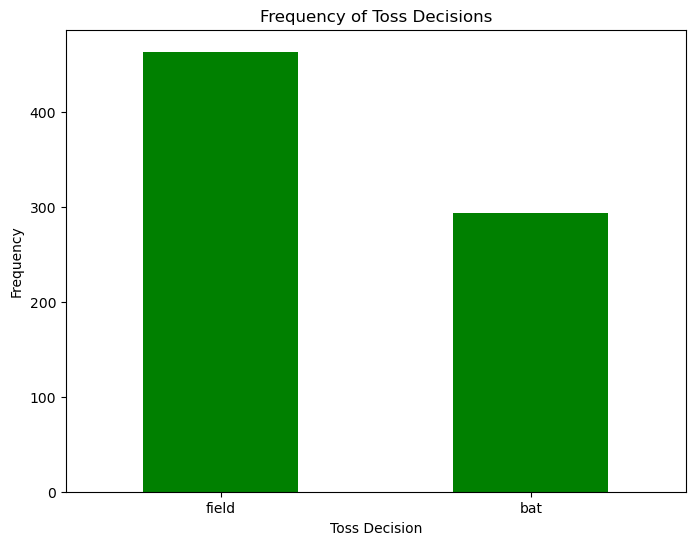

In [15]:
# box plot and pie plot
# Count the frequency of each type of toss decision
toss_decision_counts = df['toss_decision'].value_counts()

# Create a bar plot for toss decisions
plt.figure(figsize=(8, 6))
toss_decision_counts.plot(kind='bar', color='green')
plt.title('Frequency of Toss Decisions')
plt.xlabel('Toss Decision')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

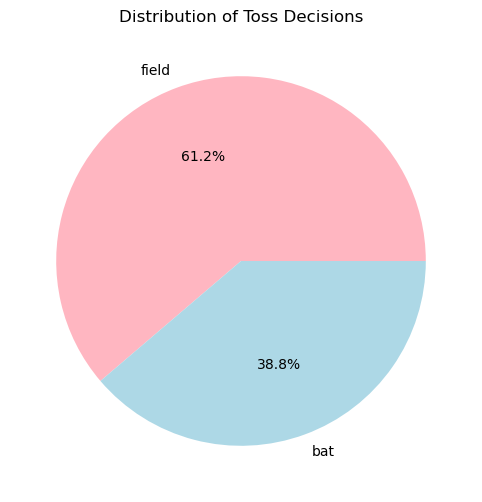

In [16]:
# Create a pie plot//chart for toss decisions
plt.figure(figsize=(8, 6))
toss_decision_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightpink', 'lightblue'])
plt.title('Distribution of Toss Decisions')
plt.ylabel('')
plt.show()


7.  What is the percentage of getting bat and field in feature 'toss_descision'?
*
1 point
38.8%, 61.2 %
60.5%, 39.5%
35.0%, 65.0   %
None of the above  

In [17]:
# Calculate the count of toss decisions for bat and field
toss_decision_counts = matches_df['toss_decision'].value_counts()
# Calculate the percentage of choosing to bat and field
percentage_bat = (toss_decision_counts['bat'] / len(df)) * 100
percentage_field = (toss_decision_counts['field'] / len(df)) * 100
# Display the percentages
print("Percentage of choosing to bat:",percentage_bat)
print("Percentage of choosing to field:",percentage_field)
toss_decision_counts = df['toss_decision'].value_counts(normalize=True)*100
toss_decision_counts

Percentage of choosing to bat: 0.16292803363101527
Percentage of choosing to field: 0.2574596572394542


field    61.243386
bat      38.756614
Name: toss_decision, dtype: float64

8.  Which statement holds true
*
1 point
A) Teams winning tosses and electing field first have won more number of matches.
B) Teams winning tosses and electing bat first have won more number of matches.
C) Both A and B
D) None of the abov

In [18]:
# Filter data for matches where toss winners chose to field first and count the wins
field_first_wins = df[(df['toss_decision'] == 'field') & (df['result'] == 'normal') & (df['toss_winner'] == df['winner'])]
# Filter data for matches where toss winners chose to bat first and count the wins
bat_first_wins = df[(df['toss_decision'] == 'bat') & (df['result'] == 'normal') & (df['toss_winner'] == df['winner'])]
# Count the number of wins for each scenario
field_first_wins_count = field_first_wins.shape[0]
bat_first_wins_count = bat_first_wins.shape[0]
# Compare the counts to determine the statement
if field_first_wins_count > bat_first_wins_count:
    print("Teams winning tosses and electing field first have won more number of matches.")
elif bat_first_wins_count > field_first_wins_count:
    print("Teams winning tosses and electing bat first have won more number of matches.")
else:
    print("Both scenarios have an equal number of wins.")


Teams winning tosses and electing field first have won more number of matches.


10. To plot the most consistent batsmen among top 10 run getters, what plotting technique we use?
*
1 point
line plot
scatter plot
count plot
box plot

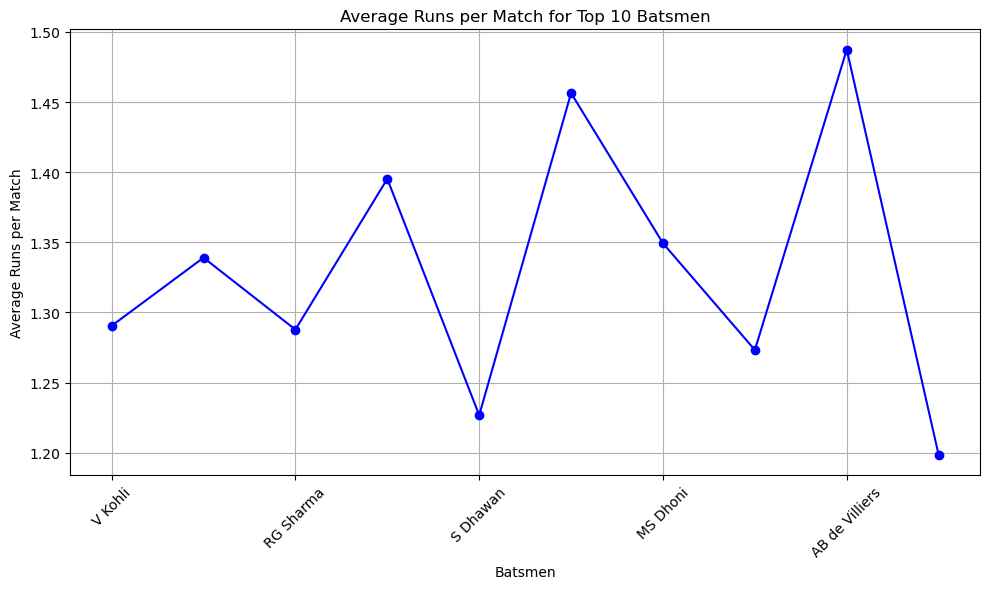

In [19]:
# Group data by 'batsman' and sum the 'batsman_runs' to get total runs for each batsman
batsmen_runs = df.groupby('batsman')['batsman_runs'].sum()

# Get the top 10 run getters
top_10_batsmen = batsmen_runs.nlargest(10)

# Assuming 'matches_played' is a column representing matches played by each batsman
# Replace it with the actual column name from your DataFrame
matches_played = df['batsman'].value_counts()

# Calculate average runs per match for each of the top 10 batsmen
average_runs_per_match = top_10_batsmen / matches_played[top_10_batsmen.index]

# Plotting average runs per match for the top 10 batsmen
plt.figure(figsize=(10, 6))
average_runs_per_match.plot(kind='line', marker='o', color='blue')
plt.title('Average Runs per Match for Top 10 Batsmen')
plt.xlabel('Batsmen')
plt.ylabel('Average Runs per Match')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

12. Most number of wickets taken by a bowler is
*
1 point
SL Malinga
DJ Bravo
Amit Mishra
Harbhajan Singh

In [20]:
import pandas as pd

# Assuming 'data_df' is your DataFrame with the mentioned columns
# Replace 'data_df' with the name of your actual DataFrame

# Filter data for rows where a player is dismissed (indicating a wicket)
dismissals = deliveries_df[deliveries_df['dismissal_kind'].notnull()]

# Group the data by the bowler and count the number of dismissals
wickets_taken = dismissals['bowler'].value_counts()

# Identify the bowler with the most number of wickets
most_wickets_bowler = wickets_taken.idxmax()

# Display the bowler who has taken the most number of wickets
print("Bowler with the most number of wickets:", most_wickets_bowler)


Bowler with the most number of wickets: SL Malinga


14.  Bowlers with maximum number of extras:
*
1 point
P Kumar
DJ Bravo
SR Watson
SL Malinga


In [21]:

# Group data by 'bowler' and sum the 'extra_runs' to get total extra runs for each bowler
bowler_extras = df.groupby('bowler')['extra_runs'].sum()

# Find the bowler with the maximum number of extras
bowler_with_max_extras = bowler_extras.idxmax()

# Display the bowler with the maximum number of extras
print("Bowler with the maximum number of extras:", bowler_with_max_extras)


Bowler with the maximum number of extras: SL Malinga


15. Which venue has hosted most number of IPL matches?
*
1 point
M Chinnaswamy Stadium
Feroz Shah Kotla
Eden Gardens
Rajiv Gandhi International Stadium

In [22]:
# Count the occurrences of each venue
venue_counts = df['venue'].value_counts()

# Get the venue that has hosted the most matches
venue_most_matches = venue_counts.idxmax()

# Display the venue that has hosted the most matches
print("Venue that has hosted the most IPL matches:", venue_most_matches)


Venue that has hosted the most IPL matches: Eden Gardens


16. In 2017 when sunrisers hyderabad clashed against Royal Challengers Bangalore which team player won player of the match?
*
1 point
AB de Villiers
Yuvraj Singh
V Kohli
DA Warner

In [23]:
# Filter data for matches between Sunrisers Hyderabad and Royal Challengers Bangalore in 2017
matches_2017 = df[(df['team1'].isin(['Sunrisers Hyderabad', 'Royal Challengers Bangalore'])) &
                  (df['team2'].isin(['Sunrisers Hyderabad', 'Royal Challengers Bangalore'])) &
                  (df['season'] == 2017)]

# Get the 'Player of the Match' for these matches
player_of_match = matches_2017['player_of_match'].iloc[0]

# Display the 'Player of the Match' for the specified match
print("Player of the Match in 2017 when Sunrisers Hyderabad clashed against Royal Challengers Bangalore:", player_of_match)
#in two mathces 1 match abondoned and other match yuvraj sing from srh got pom 

Player of the Match in 2017 when Sunrisers Hyderabad clashed against Royal Challengers Bangalore: Yuvraj Singh


17. Across seasons who are the top three batsman's with most number of run out?
*
1 point
MS Dhoni
Y Venugopal Rao
S Gill
RG Sharma
V Kohli

In [24]:
# Filter data for run-out dismissals
run_outs = df[df['dismissal_kind'] == 'run out']

# Count the occurrences of run-outs for each batsman
run_outs_by_batsman = run_outs['batsman'].value_counts()

# Get the top three batsmen with the most run-outs
top_three_batsmen_run_outs = run_outs_by_batsman.head(6)

# Display the top three batsmen with the most run-outs
print("Top three batsmen with most number of run-outs:")
print(top_three_batsmen_run_outs)

Top three batsmen with most number of run-outs:
MS Dhoni      21
RG Sharma     17
KD Karthik    16
G Gambhir     15
V Kohli       15
S Dhawan      14
Name: batsman, dtype: int64


18. What are the total runs scored by V Kohli when the bowler was JJ Burmah?
*
1 point
111
112
113
114

In [25]:
# Filter data for V Kohli as batsman and JJ Bumrah as bowler
filtered_data = df[(df['batsman'] == 'V Kohli') & (df['bowler'] == 'JJ Bumrah')]

# Calculate the total runs scored by V Kohli against JJ Bumrah
total_runs_by_kohli_vs_bumrah = filtered_data['batsman_runs'].sum()

# Display the total runs scored by V Kohli against JJ Bumrah
print("Total runs scored by V Kohli against JJ Bumrah:", total_runs_by_kohli_vs_bumrah)


Total runs scored by V Kohli against JJ Bumrah: 112.0


19. Across all seasons which player was dismissed the maximum number of times via caught and bowled
*
1 point
SE Marsh
SK Raina
BA Stokes
RA Jadeja

In [26]:
# Filter data for dismissals via 'caught and bowled'
caught_and_bowled = df[df['dismissal_kind'] == 'caught and bowled']

# Count the occurrences of 'caught and bowled' dismissals for each batsman
caught_and_bowled_counts = caught_and_bowled['player_dismissed'].value_counts()

# Identify the player dismissed the maximum number of times via 'caught and bowled'
max_dismissals_caught_bowled = caught_and_bowled_counts.idxmax()

# Display the player dismissed the maximum number of times via 'caught and bowled'
print("Player dismissed the maximum number of times via 'caught and bowled':", max_dismissals_caught_bowled)

Player dismissed the maximum number of times via 'caught and bowled': SK Raina


20. which player has the highest hard-hitting ability?
*
1 point
AB de Villiers
CH Gayle
MS Dhoni
V Kohli

In [28]:
# CH Gayle 